
#Imports



In [ ]:
import matplotlib
# !pip install opencv-python
import matplotlib.pyplot as ajeeb
import cv2
import math
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import image as mpimg
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
%matplotlib inline
from scipy import linalg
from scipy.linalg import null_space
# !pip install imageio
import imageio

from google.colab.patches import cv2_imshow

# Function to capture first frame of video

In [ ]:
def capture_first_frame(video_path, output_path):
    # Open the video file
    video_capture = cv2.VideoCapture(video_path)

    # Check if the video file is opened successfully
    if not video_capture.isOpened():
        print("Error: Unable to open the video file.")
        return

    # Read the first frame
    ret, frame = video_capture.read()

    # Check if the frame is read successfully
    if not ret:
        print("Error: Unable to read the first frame.")
        return

    # Save the first frame to the specified output path
    cv2.imwrite(output_path, frame)

    # Release the video capture object
    video_capture.release()

    print("First frame captured and saved successfully.")


## Adding the video to the google colab /content directory and saving the output image

(Only ran this once, and used the saved frame for later usage)

In [ ]:
# Specify the path to the video file
video_path = '//content/car_video.mp4'
# Specify the output path for saving the first frame
output_path = '/content/frame1.jpg'

# Call the function to capture the first frame
capture_first_frame(video_path, output_path)

First frame captured and saved successfully.


## Got the satellite image manually, through Google Earth.

In [ ]:
original_coords = (31.4757047, 74.4088574)
satellite_image = '/content/sat_view.jpeg'

## Reading the images from the above code.

(720, 1280)
(589, 405)
(1000, 1000)
(1000, 1000)
First Frame


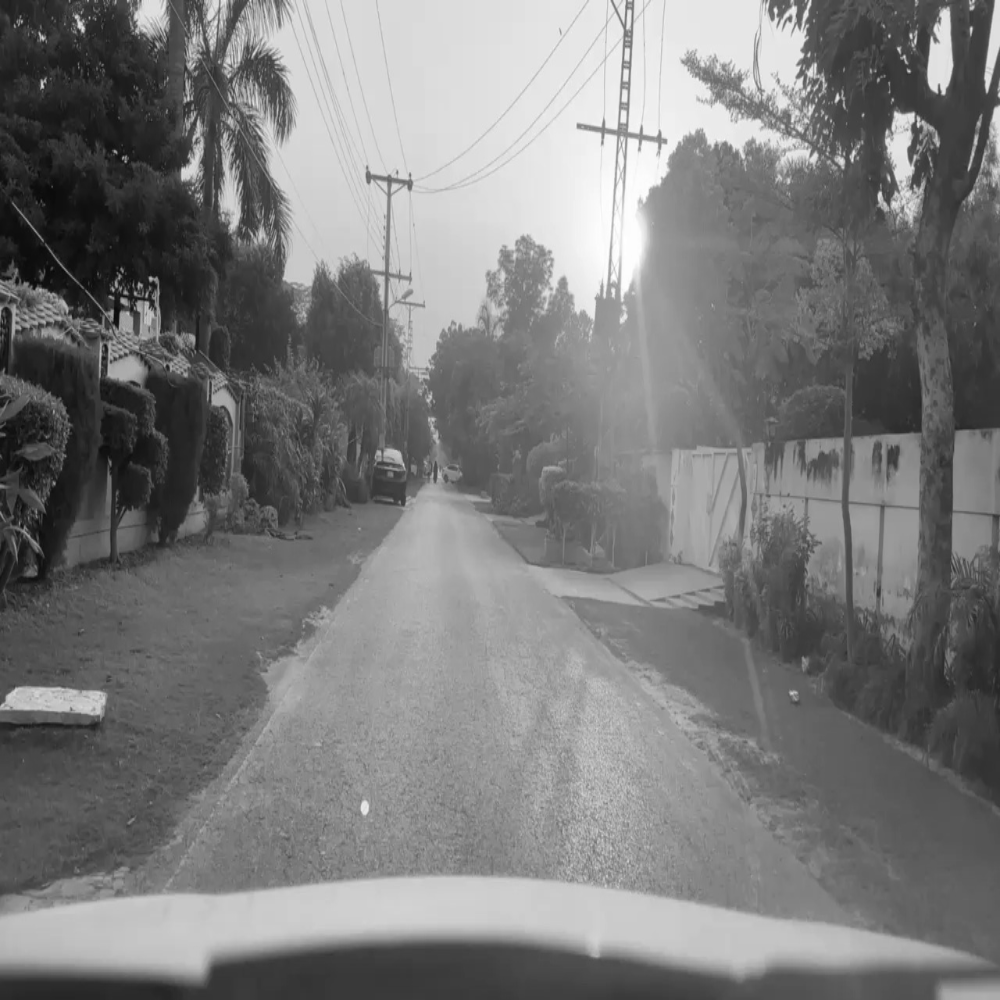

First Frame after segmentation


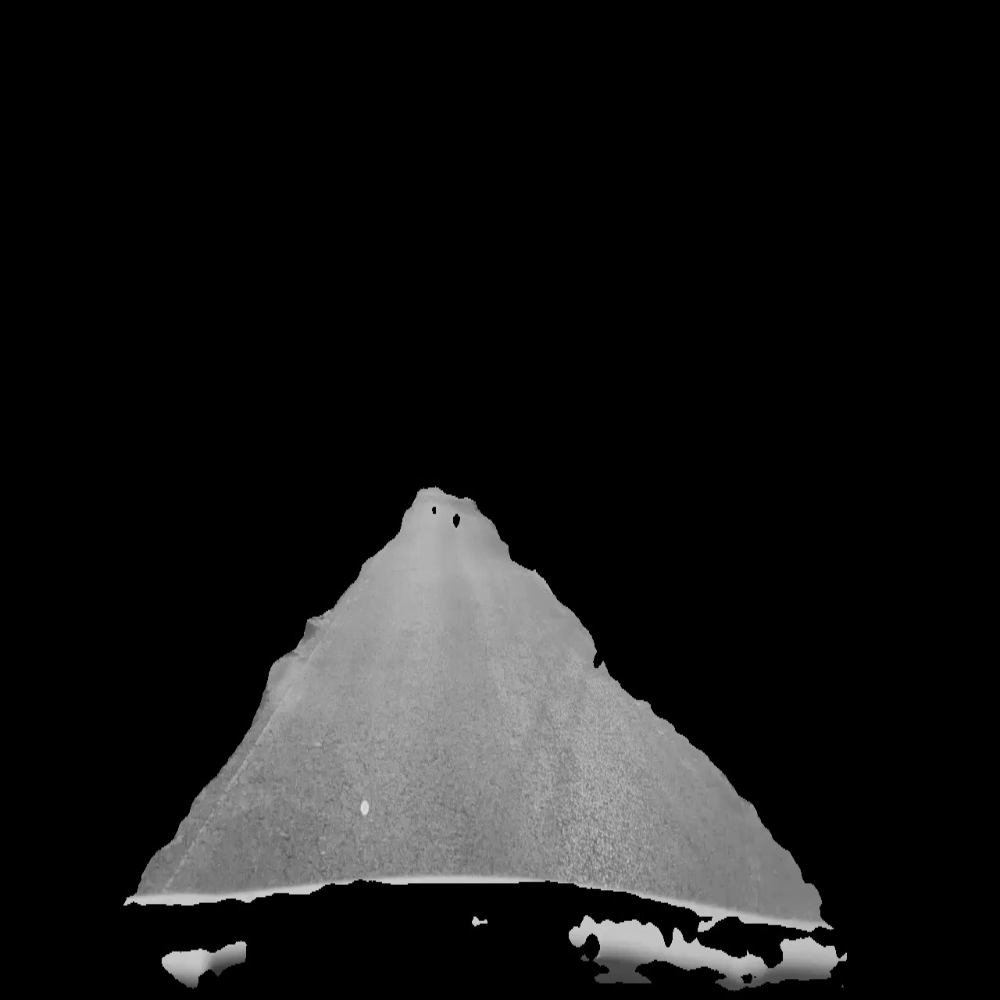

Satellite image


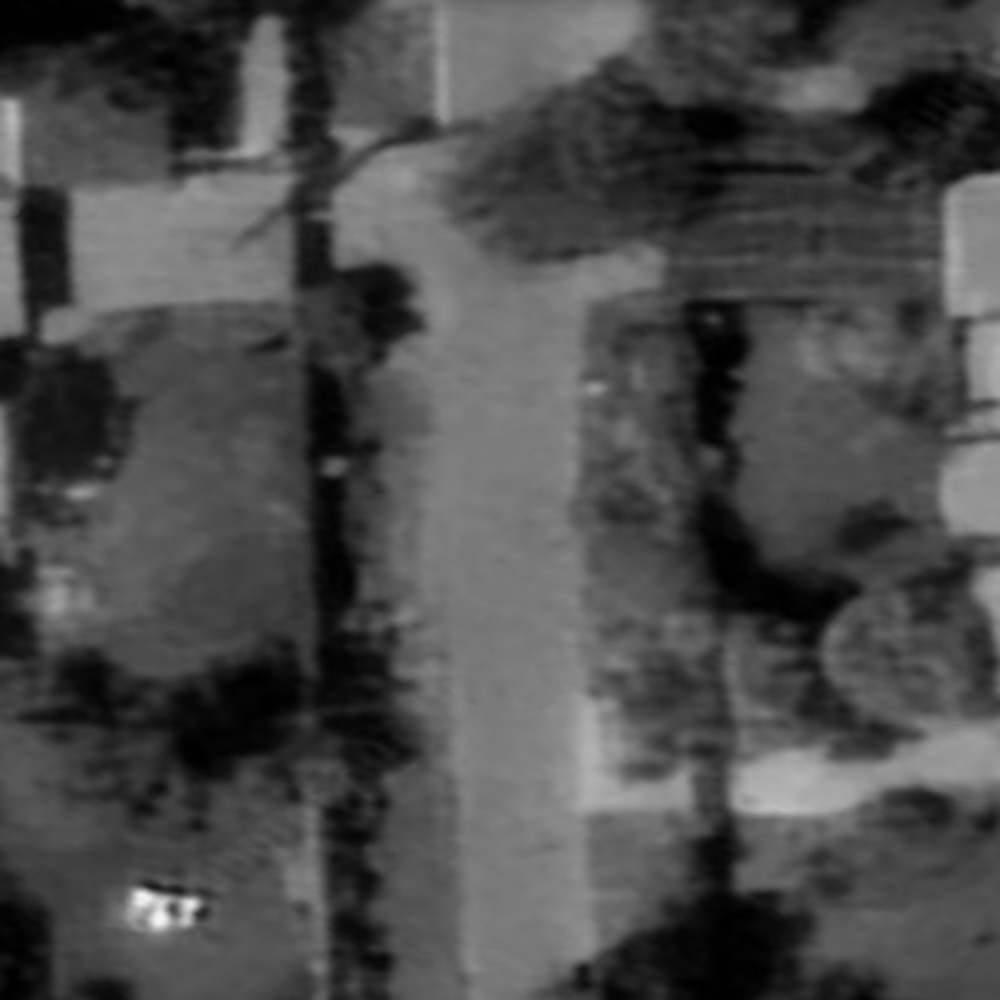

In [ ]:

img1 = cv2.imread('/content/frame1.jpeg', cv2.IMREAD_GRAYSCALE)
img_s = cv2.imread('/content/seg_img.jpeg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/sat_view.jpeg', cv2.IMREAD_GRAYSCALE)

print(img1.shape)
print(img2.shape)

# Resizing the images
img1 = cv2.resize(img1, (1000, 1000))
img2 = cv2.resize(img2, (1000, 1000))
img_s = cv2.resize(img_s, (1000, 1000))

print(img1.shape)
print(img2.shape)

print("First Frame")
cv2_imshow(img1)
print("First Frame after segmentation")
cv2_imshow(img_s)
print("Satellite image")
cv2_imshow(img2)

## Code for getting point coordinates and then also their correspondances

In [ ]:
from google.colab.patches import cv2_imshow

# Copy pasted my point reader function from the 24100092_PA3.py for simplicity
def point_reader(img):
    '''
    img - The image to be marked points on
    '''
    points = list()

    def click_event(event, x, y, flags, params):
        # checking for left mouse clicks
        if event == cv2.EVENT_LBUTTONDOWN:
            print(x, ' ', y)
            points.append((x,y))

        # checking for right mouse clicks
        if event==cv2.EVENT_RBUTTONDOWN:
            print(x, ' ', y)
            points.append((x,y))

    # Opening image and waiting till closed
    # cv2.imshow('image',img)
    cv2_imshow(img)
    cv2.setMouseCallback('image', click_event)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


    print(points)
    points = np.array(points)
    print(points)

    return points


Using the image points that gave the best homography result. We repeatedly ran the point reader function and selected corresponding points in the satellite view image.

In [ ]:
# Save your points in an np.array

print("Select at least 4 points from the image")
# initial_points = point_reader(img1)

################
initial_points = [
    [586.08008658, 815.87806638],
    [582.47258297, 689.61544012],
    [578.86507937, 298.2012987],
    [458.01370851, 814.07431457],
    [452.6024531, 682.4004329],
    [441.77994228, 328.86507937],
    [438.17243867, 139.47113997]
]

initial_points = np.array(initial_points)
########################

if len(initial_points) < 4:
    print("Please select at least 4 points")

Select at least 4 points from the image


In [ ]:
# Save your points in an np.array
print("Select the same number of points from the second image. These points must be corresponding to the previously selected points")
# final_points = point_reader(img2)
##############
final_points = [
    [559.02380952, 595.82034632],
    [528.36002886, 561.54906205],
    [490.48124098, 521.86652237],
    [355.1998557,  577.78282828],
    [373.23737374, 548.92279942],
    [405.7049062,  507.43650794],
    [414.72366522, 494.81024531]
]

final_points = np.array(final_points)
###########

if len(initial_points) != len(final_points):
  print("Please select same number of points as first image")

Select the same number of points from the second image. These points must be corresponding to the previously selected points


## Helper functions for getting homography from 2D plane to 2D plane

In [ ]:
# Function to get 2 rows of matrix given one point correspondance

def get_rows(initial, final):

    x = initial[0]
    y = initial[1]
    x2 = final[0]
    y2 = final[1]
    row1 = [x, y, 1, 0, 0, 0, -x2*x, -x2*y, -x2]
    row2 = [0, 0, 0, x, y, 1, -y2*x, -y2*y, -y2]

    return row1, row2

def make_matrix(old, new):
    if len(old) != len(new):
        return

    res = list()
    for i in range(len(old)):
        r1, r2 = get_rows(old[i],new[i])
        res.append(r1)
        res.append(r2)


    res = np.array(res)
    return res

my_mat = make_matrix(final_points, initial_points)

print(my_mat)
print(my_mat.shape)


[[ 5.59023810e+02  5.95820346e+02  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -3.27632723e+05 -3.49198440e+05
  -5.86080087e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  5.59023810e+02
   5.95820346e+02  1.00000000e+00 -4.56095265e+05 -4.86116752e+05
  -8.15878066e+02]
 [ 5.28360029e+02  5.61549062e+02  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -3.07755231e+05 -3.27086933e+05
  -5.82472583e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  5.28360029e+02
   5.61549062e+02  1.00000000e+00 -3.64365234e+05 -3.87252904e+05
  -6.89615440e+02]
 [ 4.90481241e+02  5.21866522e+02  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -2.83922462e+05 -3.02090306e+05
  -5.78865079e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  4.90481241e+02
   5.21866522e+02  1.00000000e+00 -1.46262143e+05 -1.55621275e+05
  -2.98201299e+02]
 [ 3.55199856e+02  5.77782828e+02  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.0000000

Find the homography matrix P by doing SVD on the matrix we got above. This was the same code as PA3.


In [ ]:
# List of useful functions
u, s, vh = np.linalg.svd(my_mat) # Replace it with your H matrix
vh = np.transpose(vh)
P = vh[:,len(vh[0])-1]

P = np.array([P[0:3], P[3:6], P[6:9]])
print("Homography matrix\n",P)

P_inverse = np.linalg.inv(P)
print("Inverse Homography matrix\n",P_inverse)

Homography matrix
 [[-1.22521694e-04  9.42912528e-04 -3.69150747e-01]
 [-5.02131563e-04  2.32199103e-03 -9.29365832e-01]
 [-5.53416550e-07  1.83413284e-06 -5.73390455e-04]]
Inverse Homography matrix
 [[ 1.11822409e+04 -4.08770150e+03 -5.73714593e+05]
 [ 6.78441502e+03 -4.01659073e+03  2.14236268e+06]
 [ 1.09089386e+01 -8.90276299e+00  5.66260019e+03]]


# Applying the homography on the first frame and displaying results

Frame 1:


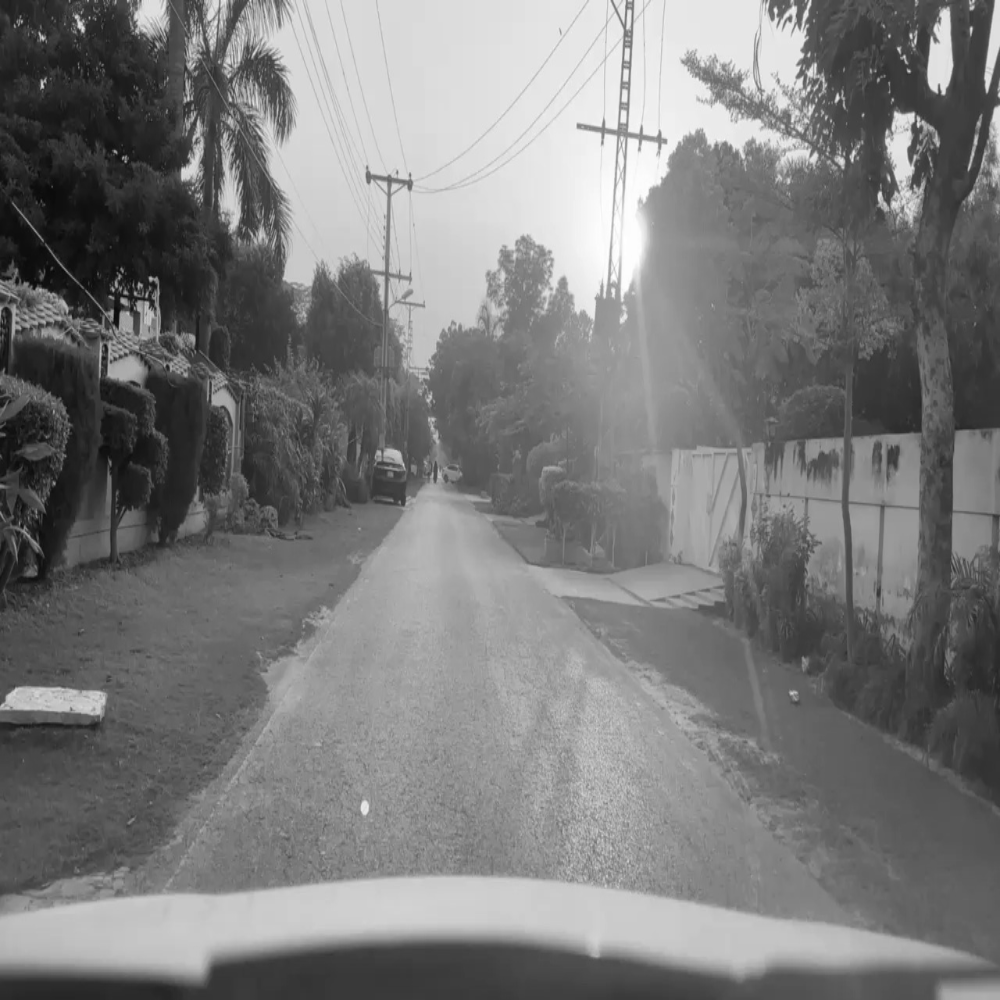

Frame 1 after Segmentation:


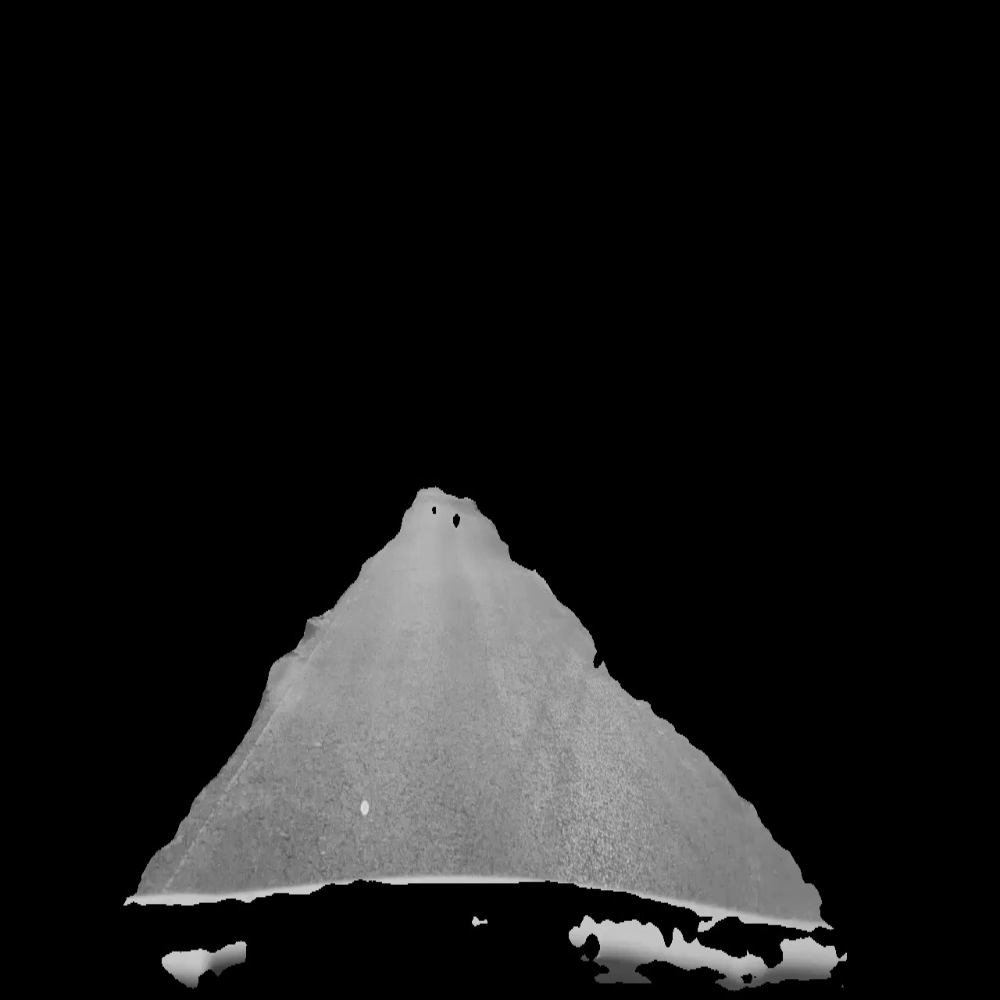

Frame 1 top view:


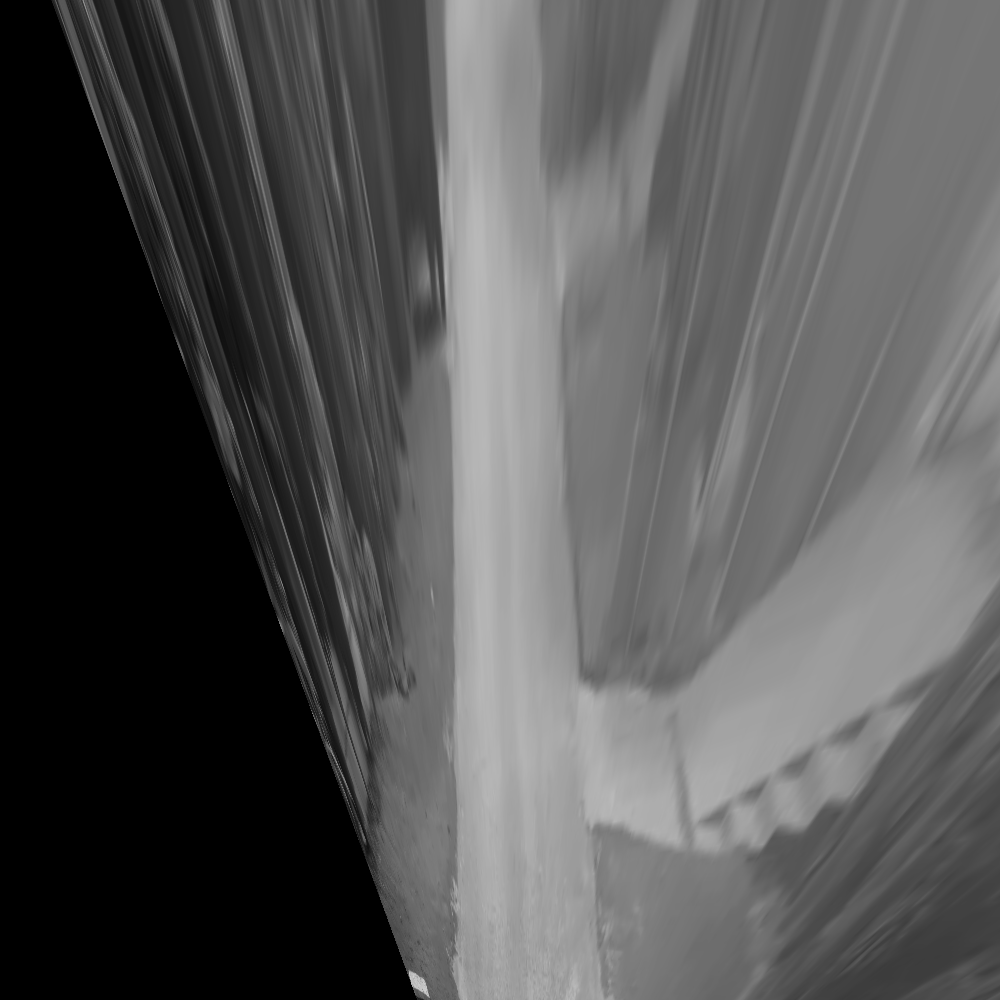

Segmentted Frame 1 top view:


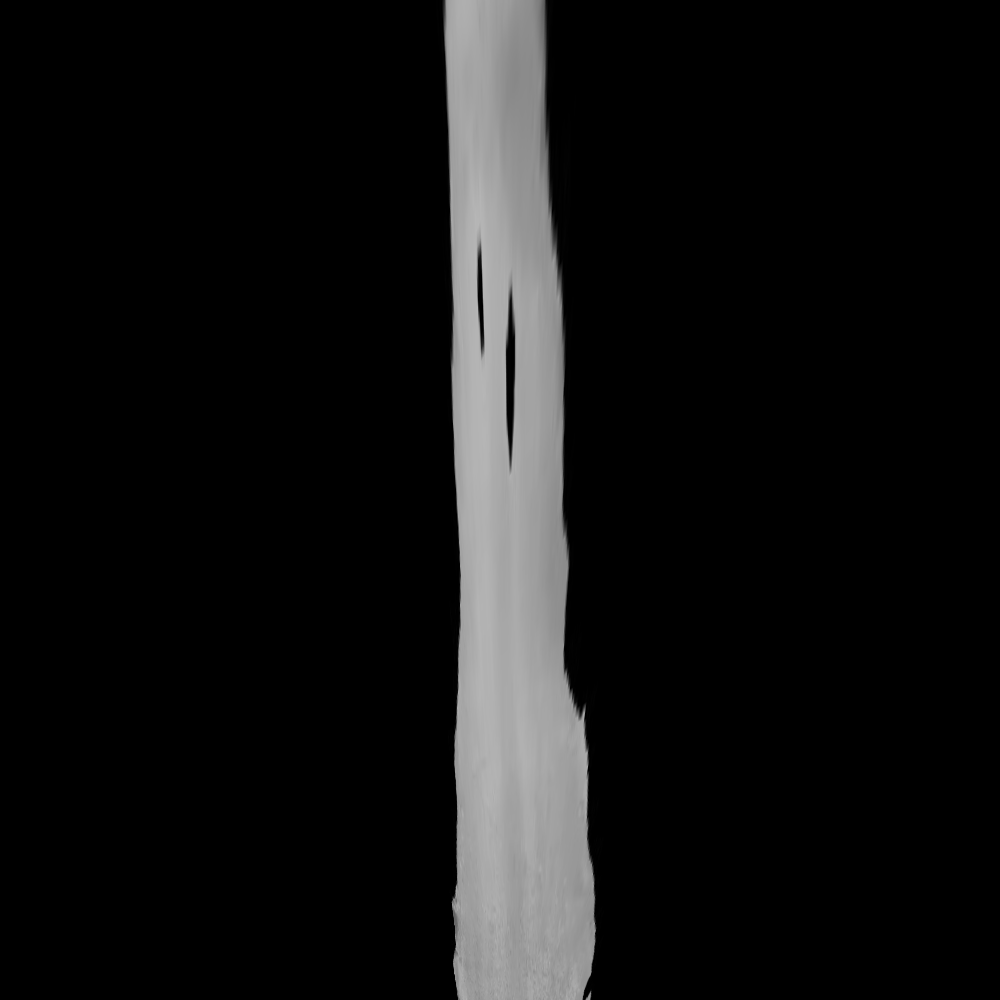

In [ ]:
# # Assuming img1 is your car cam image
# img_s = cv2.imread('/content/segmented_road_f1.png')

# Get the dimensions of the car cam image
height, width = img2.shape[:2]

# Use cv2.warpPerspective to transform the car cam view to top view
img1_top_view = cv2.warpPerspective(img1, P, (width, height))
imgs_top_view = cv2.warpPerspective(img_s, P, (width, height))

# Display the original and transformed images
print("Frame 1:")
cv2_imshow(img1)
print("Frame 1 after Segmentation:")
cv2_imshow(img_s)
print("Frame 1 top view:")
cv2_imshow(img1_top_view)
print("Segmentted Frame 1 top view:")
cv2_imshow(imgs_top_view)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Saving the top view image

In [ ]:
filename = '/content/first_frame_top_view.jpg'

# Using cv2.imwrite() method
# Saving the image
cv2.imwrite(filename, imgs_top_view)

True